In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('us_tornado_dataset_1950_2021.csv') 


In [4]:
print(df.columns)

Index(['yr', 'mo', 'dy', 'date', 'st', 'mag', 'inj', 'fat', 'slat', 'slon',
       'elat', 'elon', 'len', 'wid'],
      dtype='object')


0   1950-01-03
1   1950-01-03
2   1950-01-03
3   1950-01-13
4   1950-01-25
Name: date, dtype: datetime64[ns]
datetime64[ns]


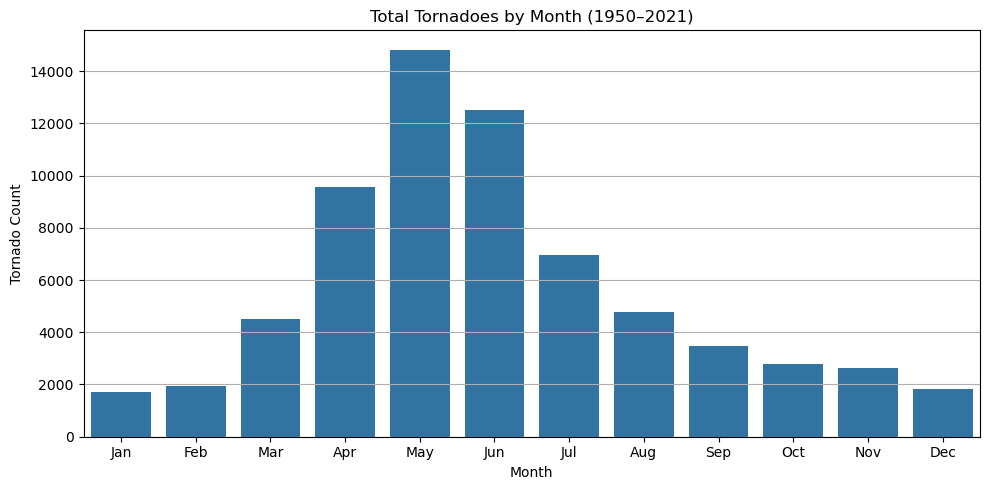

In [6]:
# Basic Cleaning
df.columns = df.columns.str.lower()  # lowergcase all column names for consistency

# Convert yr/mo/dy into proper datetime
df['date'] = pd.to_datetime(df[['yr', 'mo', 'dy']].rename(
    columns={'yr': 'year', 'mo': 'month', 'dy': 'day'}
))

# check if conversion worked
print(df['date'].head()
print(df['date'].dtype) 

# Tornado Count by Month (All Years Combined)
monthly_counts = df['mo'].value_counts().sort_index()

# Plot: Tornadoes by Month
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Total Tornadoes by Month (1950–2021)")
plt.xlabel("Month")
plt.ylabel("Tornado Count")
plt.xticks(
    ticks=range(0, 12),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

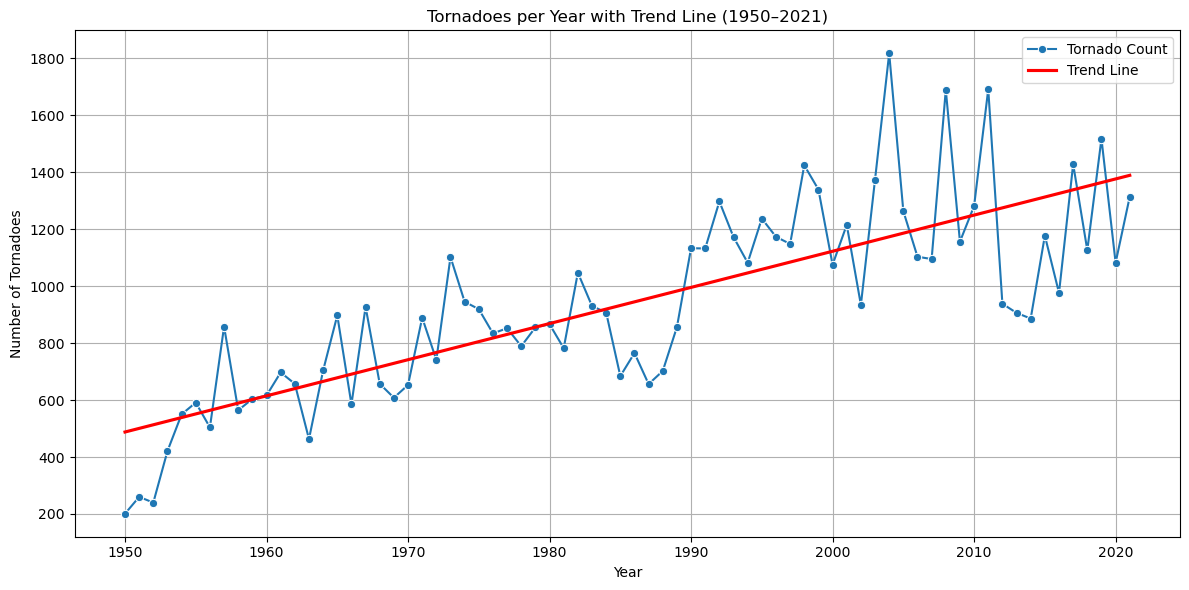

In [12]:
yearly_counts = df['yr'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, label='Tornado Count', marker='o')
sns.regplot(x=yearly_counts.index, y=yearly_counts.values, scatter=False, ci=None, color='red', label='Trend Line')
plt.title("Tornadoes per Year with Trend Line (1950–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

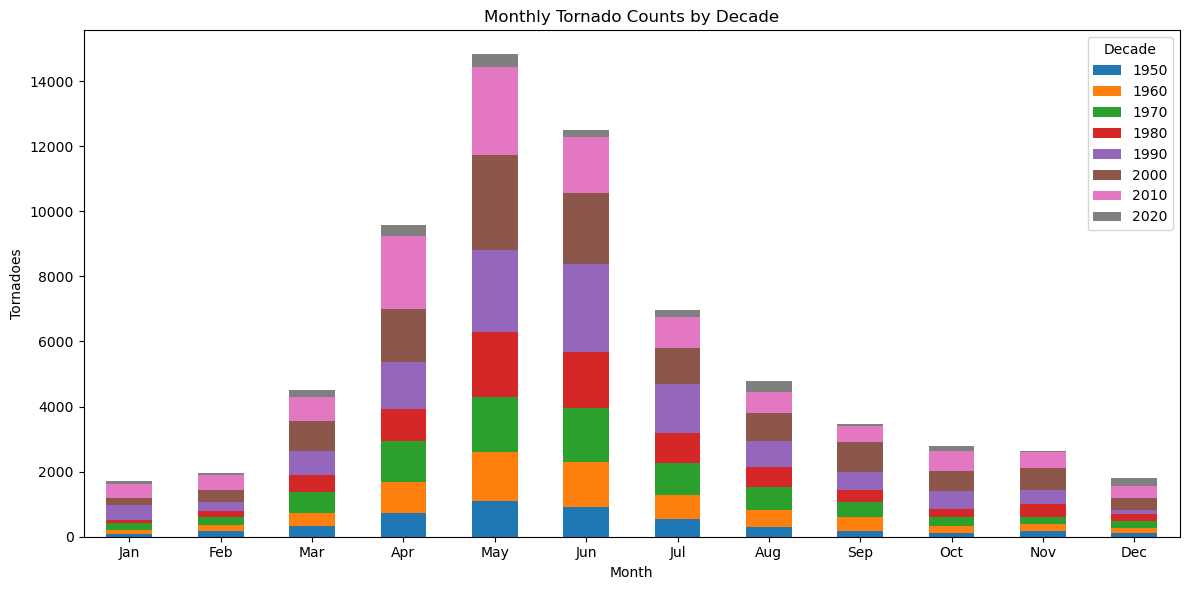

In [8]:
df['decade'] = (df['yr'] // 10) * 10
pivot = df.groupby(['decade', 'mo']).size().unstack().fillna(0)

# Stacked bar 
pivot.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Monthly Tornado Counts by Decade")
plt.xlabel("Month")
plt.ylabel("Tornadoes")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.legend(title='Decade')
plt.tight_layout()
plt.show()

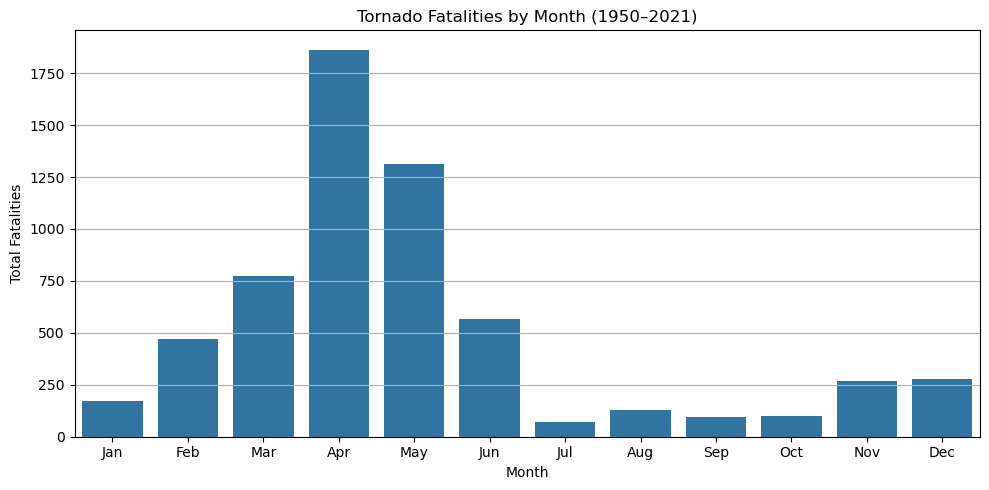

In [11]:
monthly_deaths = df.groupby('mo')['fat'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values)
plt.title("Tornado Fatalities by Month (1950–2021)")
plt.xlabel("Month")
plt.ylabel("Total Fatalities")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [13]:
state_counts = df['st'].value_counts().reset_index()
state_counts.columns = ['state_abbr', 'tornado_count']

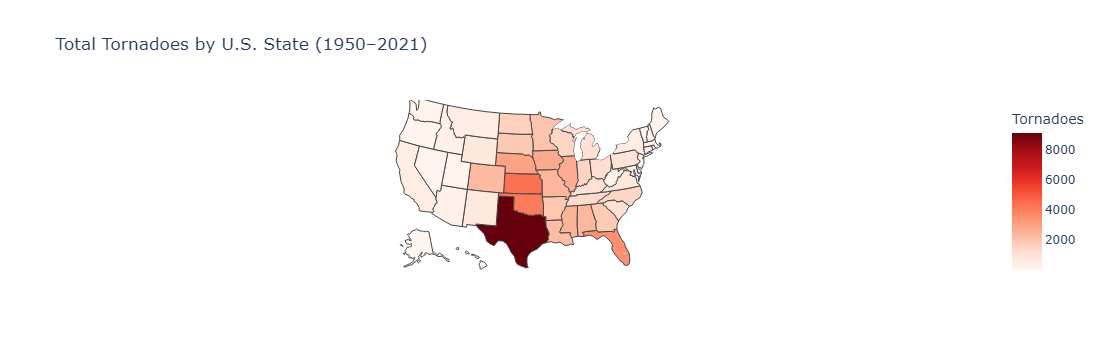

In [14]:
import plotly.express as px

fig = px.choropleth(
    state_counts,
    locations='state_abbr',
    locationmode='USA-states',
    color='tornado_count',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'tornado_count': 'Tornadoes'},
    title='Total Tornadoes by U.S. State (1950–2021)'
)
fig.show()

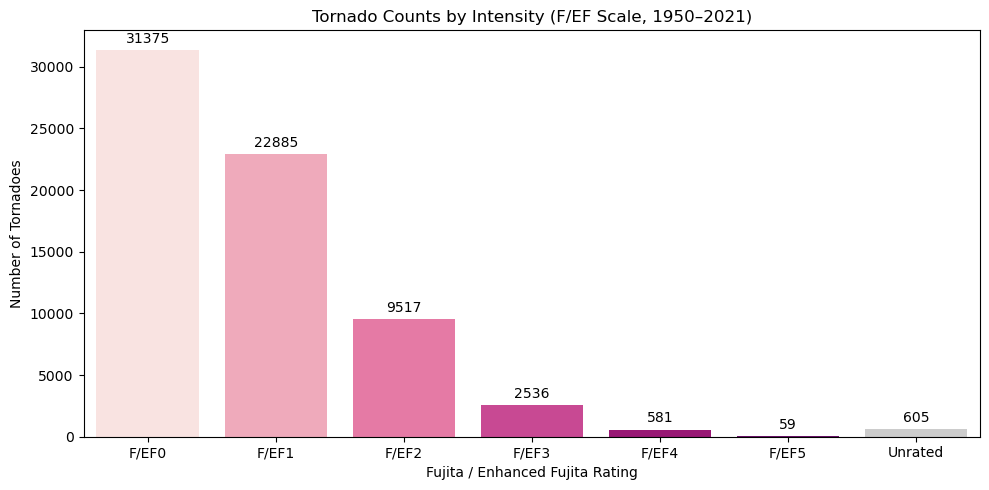

In [30]:
# Map numeric magnitudes to labeled categories
df['mag_labeled'] = df['mag'].replace({
    -9: 'Unrated',
     0: 'F/EF0',
     1: 'F/EF1',
     2: 'F/EF2',
     3: 'F/EF3',
     4: 'F/EF4',
     5: 'F/EF5'
})

# Define order
order = ['F/EF0', 'F/EF1', 'F/EF2', 'F/EF3', 'F/EF4', 'F/EF5', 'Unrated']

# Define custom red shades (light to dark + gray for Unrated)
custom_palette = {
    'F/EF0': '#fde0dd',
    'F/EF1': '#fa9fb5',
    'F/EF2': '#f768a1',
    'F/EF3': '#dd3497',
    'F/EF4': '#ae017e',
    'F/EF5': '#7a0177',
    'Unrated': '#cccccc'
}

# Create plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x='mag_labeled',
    hue='mag_labeled',
    data=df,
    order=order,
    palette=custom_palette,
    legend=False
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title("Tornado Counts by Intensity (F/EF Scale, 1950–2021)")
plt.xlabel("Fujita / Enhanced Fujita Rating")
plt.ylabel("Number of Tornadoes")
plt.tight_layout()
plt.show()

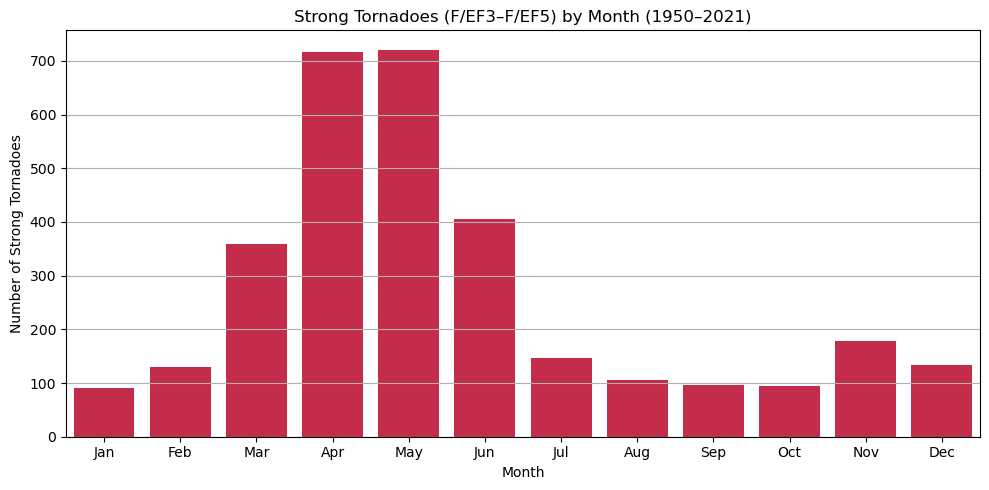

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for strong tornadoes only (F/EF3–F/EF5)
strong_df = df[df['mag'].isin([3, 4, 5])]

# Group and count by month
strong_monthly = strong_df['mo'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=strong_monthly.index, y=strong_monthly.values, color='crimson')

plt.title("Strong Tornadoes (F/EF3–F/EF5) by Month (1950–2021)")
plt.xlabel("Month")
plt.ylabel("Number of Strong Tornadoes")
plt.xticks(
    ticks=range(0, 12),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

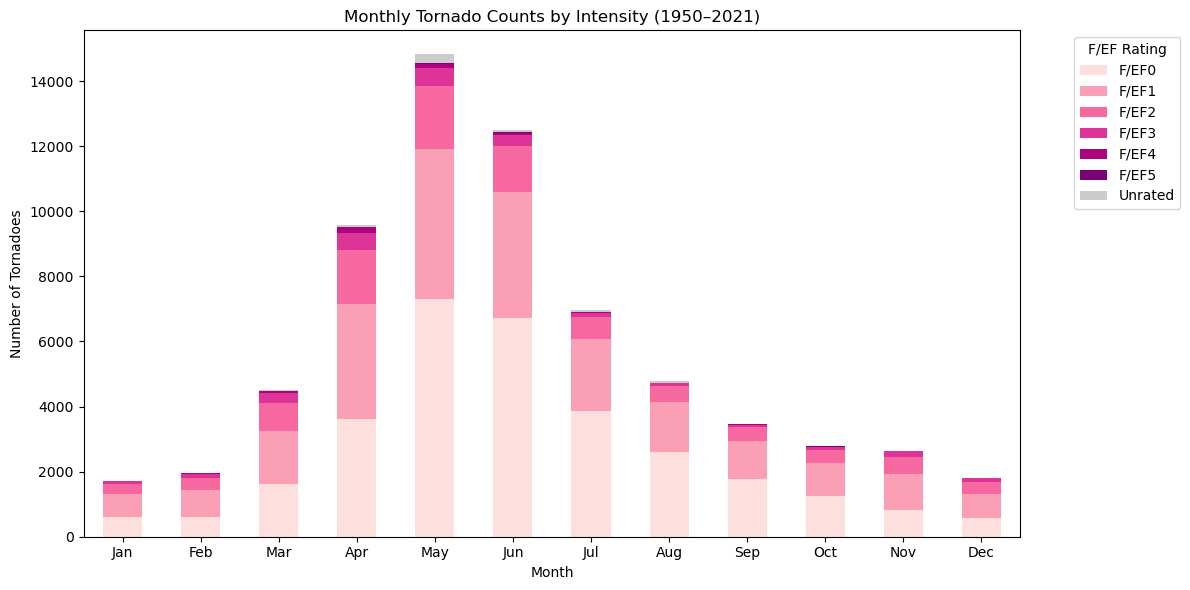

In [32]:
# Ensure labeled intensity values exist
df['mag_labeled'] = df['mag'].replace({
    -9: 'Unrated',
     0: 'F/EF0',
     1: 'F/EF1',
     2: 'F/EF2',
     3: 'F/EF3',
     4: 'F/EF4',
     5: 'F/EF5'
})

# Group by month and intensity
monthly_intensity = pd.crosstab(df['mo'], df['mag_labeled'])

# Sort columns for stacking order (light to dark, then Unrated)
monthly_intensity = monthly_intensity[['F/EF0', 'F/EF1', 'F/EF2', 'F/EF3', 'F/EF4', 'F/EF5', 'Unrated']]

# Plot
monthly_intensity.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[
        '#fde0dd',  # F/EF0
        '#fa9fb5',  # F/EF1
        '#f768a1',  # F/EF2
        '#dd3497',  # F/EF3
        '#ae017e',  # F/EF4
        '#7a0177',  # F/EF5
        '#cccccc'   # Unrated
    ]
)

# Format
plt.title("Monthly Tornado Counts by Intensity (1950–2021)")
plt.xlabel("Month")
plt.ylabel("Number of Tornadoes")
plt.xticks(
    ticks=range(0, 12),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    rotation=0
)
plt.legend(title="F/EF Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()